In [6]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt


# 1) Load WLAS Dataset #

In [2]:
# Absolute main path
main_path = '../data/'

# Read JSON file into a DataFrame with unprocessed instance col
wlas_df = pd.read_json(main_path + 'WLASL_v0.3.json')

print(wlas_df.head())
print(wlas_df.shape)


      gloss                                          instances
0      book  [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...
1     drink  [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...
2  computer  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
3    before  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
4     chair  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
(2000, 2)


# 2) Extract the available videos list from the dataset #

In [3]:
def get_videos_ids(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids of the current instance

    Input: instance json list
    Output: list of videos_ids
    """
    videos_list = []
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_list.append(video_id)
    return videos_list


In [4]:
def get_json_features(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids and url or any other featrue of the current instance

    input: instance json list
    output: list of videos_ids
    """
    videos_ids = []
    videos_urls = []
    for ins in json_list:
        video_id = ins['video_id']
        video_url = ins['url']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_ids.append(video_id)
            videos_urls.append(video_url)
    return videos_ids, videos_urls


In [5]:
# Open JSON file (read only)
with open(main_path+'WLASL_v0.3.json', 'r') as data_file:
    json_data = data_file.read()

instance_json = json.loads(json_data)


In [6]:
# Test "get_videos_ids" function with first gloss (word = book) in file
get_videos_ids(instance_json[0]['instances'])[0]


'69241'

In [7]:
# Check output length of function (40 links for book)
# Function returns only ids that can also be found in the 'data/videos' folder
len(get_videos_ids(instance_json[0]['instances']))


6

In [8]:
# Get available video ids for all rows in wlas_df and add to new col 'videos_id'
wlas_df['videos_ids'] = wlas_df['instances'].apply(get_videos_ids)
wlas_df.head()


,gloss,instances,videos_ids
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...","[69241, 07069, 07068, 07070, 07099, 07074]"
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...","[69302, 65539, 17710, 17733, 65540, 17734, 177..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[12328, 12312, 12311, 12338, 12313, 12314, 123..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[05728, 05749, 05750, 05729, 05730, 65167, 057..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[09848, 09869, 09849, 09850, 09851, 65328, 09854]"


In [9]:
# Create separate DataFrame for available information in each instance
features_df = pd.DataFrame(columns=['word', 'video_id', 'url'])

for row in wlas_df.iterrows():
    # Extract ids and urls for each row
    ids, urls = get_json_features(row[1][1])
    # Initialize a list matching the length (n) of found ids containing the word
    word = [row[1][0]] * len(ids)
    # Using zip to create new df with:
    # n * word in gloss col (e.g. 6 * book)
    # Unique id and url in ids and url col respectively
    df = pd.DataFrame(list(zip(word, ids, urls)), columns = features_df.columns)
    # Append temporary df to feature_df
    features_df = features_df.append(df, ignore_index=True)


/tmp/ipykernel_202358/123532564.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(df, ignore_index=True)


In [12]:
# Renaming index col to index
features_df.index.name = 'index'
features_df


,word,video_id,url
index,,,
0,book,69241,http://aslbricks.org/New/ASL-Videos/book.mp4
1,book,07069,https://signstock.blob.core.windows.net/signsc...
2,book,07068,https://s3-us-west-1.amazonaws.com/files.start...
3,book,07070,https://media.asldeafined.com/vocabulary/14666...
4,book,07099,http://www.aslsearch.com/signs/videos/book.mp4
...,...,...,...
11975,wheelchair,63047,https://www.signingsavvy.com/signs/mp4/5/5233.mp4
11976,wheelchair,63050,http://www.aslsearch.com/signs/videos/wheelcha...
11977,whistle,63186,https://media.spreadthesign.com/video/mp4/13/9...


In [15]:
# Creating csv from features_df
features_df.to_csv('../data/features_df.csv', index=False)


# 3) Dataset Classes analysis #

In [16]:
# Counting number of videos per word in new col 'samples_num'
wlas_df['samples_num'] = wlas_df['videos_ids'].apply(len)
wlas_df = wlas_df.rename(columns={'gloss': 'word'})
wlas_df.head()


,word,instances,videos_ids,samples_num
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...","[69241, 07069, 07068, 07070, 07099, 07074]",6
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...","[69302, 65539, 17710, 17733, 65540, 17734, 177...",15
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[12328, 12312, 12311, 12338, 12313, 12314, 123...",14
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[05728, 05749, 05750, 05729, 05730, 65167, 057...",16
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...","[09848, 09869, 09849, 09850, 09851, 65328, 09854]",7


In [17]:
print("Min number of videos for a word:", wlas_df['samples_num'].min())
print("Max number of videos for a word:", wlas_df['samples_num'].max())


Min number of videos for a word: 2
Max number of videos for a word: 16


In [21]:
# Creating a visualization df, grouping the words with same number of samples
words_sample_counts = wlas_df[['word', 'samples_num']]\
                      .groupby('samples_num')\
                      .agg({"word":['count', ', '.join]})
words_sample_counts


word                                                   
            count                                               join
samples_num                                                         
2              14  gloves, careless, wash face, curtain, grey, la...
3              76  garage, parents, boots, excuse, furniture, rep...
4             335  hello, newspaper, asl, that, will, cards, hate...
5             511  clothes, table, movie, clock, pencil, behind, ...
6             402  book, birthday, need, have, knife, read, name,...
7             307  chair, dance, eat, forget, but, jacket, paint,...
8             151  all, blue, hearing, wrong, color, enjoy, time,...
9             100  fine, finish, now, can, hat, kiss, cow, meet, ...
10             48  year, black, hot, like, many, orange, fish, gr...
11             26  deaf, no, walk, mother, woman, dog, family, ap...
12             13  yes, what, later, man, shirt, change, corn, da...
13              8  candy, thanksgiving, bed, bowling, tall, accid...
14              4                        computer, who, cousin, help
15              2                                          drink, go
16              3                                 before, thin, cool

In [22]:
# All the words per number of videos
words_per_samples_num = 11
words_sample_counts.loc[words_per_samples_num].values[1]


'deaf, no, walk, mother, woman, dog, family, apple, play, letter, thursday, bar, brother, check, laugh, room, take, why, example, far, leave, soon, champion, delay, environment, score'

In [23]:
"""
Download request for additional URLs
"""

# import urllib.request

# url = 'https://www.youtube.com/watch?v=0UsjUE-TXns'
# urllib.request.urlretrieve(url, f'test/test.mp4')

# opener = urllib.request.build_opener()
# opener.addheaders = [('User-agent', 'Mozilla/5.0')]
# urllib.request.install_opener(opener)
# urllib.request.urlretrieve(url, f'test/test.mp4')


('test/test.mp4', <http.client.HTTPMessage at 0x7ff3775f2aa0>)

## 4. Mediapipe testing

In [1]:
#install mediapipe
!pip install -q mediapipe==0.10.0

#download model bundle
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task


In [7]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2


2023-11-22 17:25:02.362603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 17:25:02.635277: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-22 17:25:02.648628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/eigot/.pyenv/versions/3.10.6/envs/SignFlow/lib/python3.10/site-packages/cv2/../../lib64:
2023-11-22 1

In [8]:
# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [31]:
import cv2
# Read the image
image = cv2.imread('../data_test/test_original.jpg')

# Resize the image to 192x192 pixels
width, height = 192, 192
resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

# Save the resized image
cv2.imwrite('../data_test/test_resized.jpg', resized_image)


True

In [17]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = ['../data_test/test_resized.jpg']


Handedness: [classification {
  index: 1
  score: 0.9946786761283875
  label: "Right"
}
, classification {
  index: 0
  score: 0.9939258694648743
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.5866114497184753
  y: 0.510737955570221
  z: -1.0913474568496895e-07
}
landmark {
  x: 0.5463449954986572
  y: 0.49387162923812866
  z: -0.0058342632837593555
}
landmark {
  x: 0.5143635272979736
  y: 0.4613002836704254
  z: -0.01169377937912941
}
landmark {
  x: 0.4881698489189148
  y: 0.4398517608642578
  z: -0.02030215412378311
}
landmark {
  x: 0.47395646572113037
  y: 0.4172592759132385
  z: -0.029058178886771202
}
landmark {
  x: 0.540350615978241
  y: 0.398327112197876
  z: 0.004646554589271545
}
landmark {
  x: 0.5080354809761047
  y: 0.3764241933822632
  z: -0.01878993771970272
}
landmark {
  x: 0.48430144786834717
  y: 0.3850146234035492
  z: -0.04099550470709801
}
landmark {
  x: 0.46961361169815063
  y: 0.40156811475753784
  z: -0.05291241779923439
}
landmark {
  x: 0.557471871

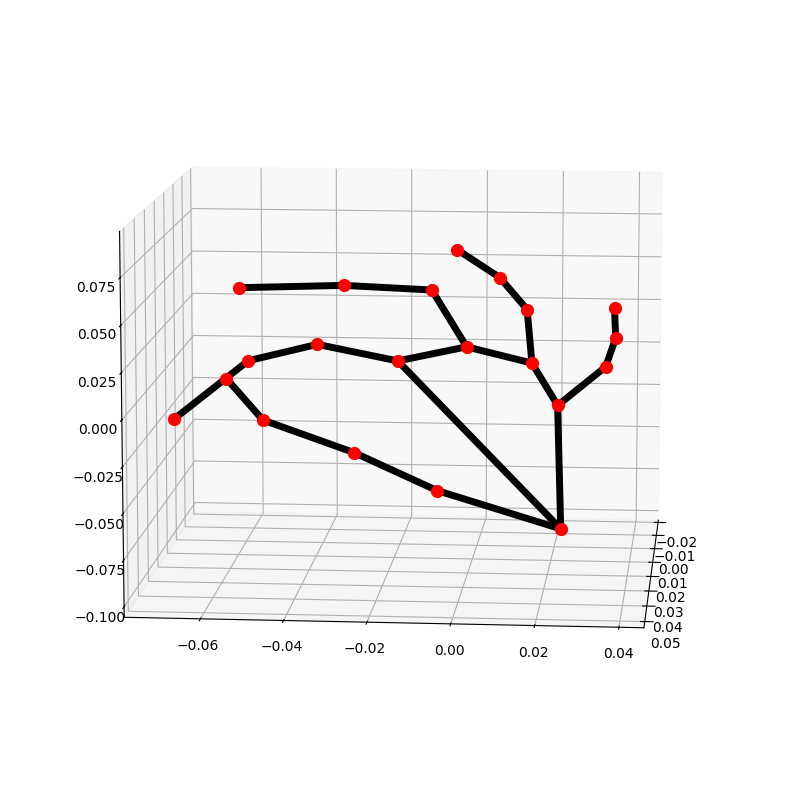

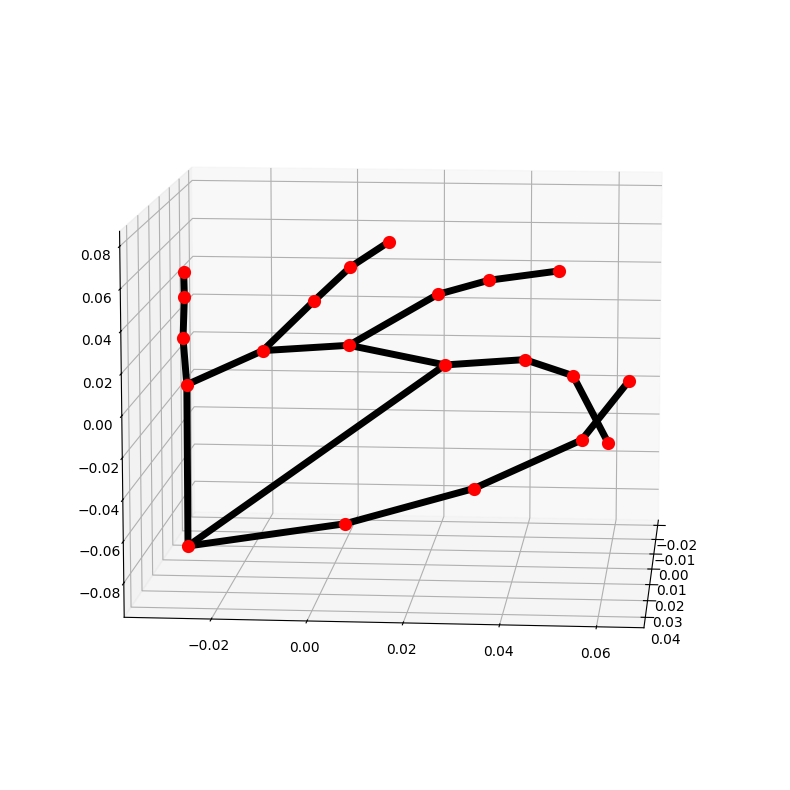

In [18]:
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)


In [32]:
import mediapipe as mp
import cv2

mp_hands = mp.solutions.hands

# Initialize MediaPipe Hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

image_path = "../data_test/test_resized.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to get hand landmarks
results = hands.process(image_rgb)

hands.close()

# If hands are detected, extract landmarks
if results.multi_hand_landmarks:
    hand_landmarks_list = []

    for hand_landmarks in results.multi_hand_landmarks:
        for landmark in hand_landmarks.landmark:
            hand_landmarks_list.append((landmark.x, landmark.y, landmark.z))

            # Uncomment below if you want to print coordinates for each landmark
            # print(f"X: {landmark.x}, Y: {landmark.y}, Z: {landmark.z}")

            if len(hand_landmarks_list) == 20:  # Stop after 20 landmarks for each hand
                break

        if len(hand_landmarks_list) == 40:  # Stop after both hands are processed
            break

# If fewer than 40 landmarks are found, pad the list
while len(hand_landmarks_list) < 40:
    hand_landmarks_list.append((0, 0, 0))  # Padding with zeros for missing landmarks

print(hand_landmarks_list)  # List of x, y, z coordinates for 40 landmarks


[(0.4906206429004669, 0.9045348167419434, 1.0199063353866222e-06), (0.593612790107727, 0.8178741335868835, -0.08320233970880508), (0.618688702583313, 0.6800565719604492, -0.11526215076446533), (0.5245659351348877, 0.5743332505226135, -0.14262457191944122), (0.42129114270210266, 0.5132187604904175, -0.1651056557893753), (0.5985925793647766, 0.5006134510040283, -0.04357154667377472), (0.6260632276535034, 0.3484293818473816, -0.0973653718829155), (0.639551043510437, 0.25525522232055664, -0.1337800920009613), (0.6470932364463806, 0.17542579770088196, -0.15593163669109344), (0.4947509467601776, 0.5053805708885193, -0.039663031697273254), (0.4327620267868042, 0.3375495970249176, -0.10902240127325058), (0.38378190994262695, 0.23824188113212585, -0.1521308720111847), (0.33899784088134766, 0.15796175599098206, -0.168867826461792), (0.4134655296802521, 0.558212399482727, -0.04519648477435112), (0.37017372250556946, 0.4799201488494873, -0.1520087569952011), (0.4224744737148285, 0.5765730142593384

In [22]:
len(hand_landmarks_list)
hand_landmarks_list[0]


(0.4099890887737274, 0.5132353901863098, 1.6371762967537506e-07)

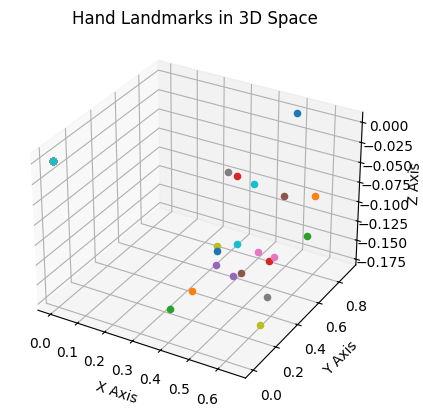

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates for each point and plot them
for x, y, z in hand_landmarks_list:
    ax.scatter(x, y, z, marker='o', s=20)  # Change marker and size as needed

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Hand Landmarks in 3D Space')

plt.show()


In [34]:
# !pip install plotly


In [35]:
import plotly.graph_objs as go

x_coords, y_coords, z_coords = zip(*hand_landmarks_list)

# Create a Plotly trace for the scatter plot
trace = go.Scatter3d(
    x=x_coords,
    y=y_coords,
    z=z_coords,
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.8)
)

# Define layout for the 3D plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X Axis'),
        yaxis=dict(title='Y Axis'),
        zaxis=dict(title='Z Axis')
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create figure and add trace to the plot
fig = go.Figure(data=[trace], layout=layout)

# Display the interactive plot
fig.show()


# 5. Learning about data

In [3]:
import cv2

# cap = cv2.VideoCapture("/home/eigot/code/Kaaykun/SignFlow/backend/data/videos/00335.mp4")
cap = cv2.VideoCapture("/home/eigot/code/Kaaykun/SignFlow/backend/data/videos/00336.mp4")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )


65


In [24]:
num_frames = []

for filename in os.listdir("../data/videos"):
    if filename.endswith(".mp4"):
        # print(f"../data/videos/{filename}")
        cap = cv2.VideoCapture(f"../data/videos/{filename}")
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        num_frames.append(length)


../data/videos/14182.mp4
../data/videos/53700.mp4
../data/videos/53744.mp4
../data/videos/08452.mp4
../data/videos/16317.mp4
../data/videos/30170.mp4
../data/videos/19857.mp4
../data/videos/45929.mp4
../data/videos/16503.mp4
../data/videos/07509.mp4
../data/videos/66149.mp4
../data/videos/51719.mp4
../data/videos/36857.mp4
../data/videos/31152.mp4
../data/videos/09807.mp4
../data/videos/57784.mp4
../data/videos/43220.mp4
../data/videos/05999.mp4
../data/videos/15093.mp4
../data/videos/64266.mp4
../data/videos/62785.mp4
../data/videos/65815.mp4
../data/videos/45438.mp4
../data/videos/32476.mp4
../data/videos/10446.mp4
../data/videos/51198.mp4
../data/videos/16398.mp4
../data/videos/46732.mp4
../data/videos/42309.mp4
../data/videos/31776.mp4
../data/videos/66581.mp4
../data/videos/55043.mp4
../data/videos/28210.mp4
../data/videos/03267.mp4
../data/videos/06193.mp4
../data/videos/37370.mp4
../data/videos/44179.mp4
../data/videos/61444.mp4
../data/videos/37989.mp4
../data/videos/15732.mp4


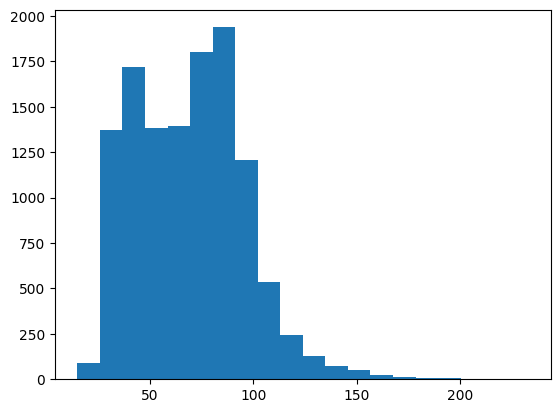

In [36]:
plt.hist(num_frames, bins=20);


In [34]:
pd.DataFrame(num_frames).describe()


,0
count,11980.000000
mean,69.122955
std,26.640414
min,15.000000
25%,46.000000
50%,70.000000
75%,87.000000
max,233.000000


In [85]:
video_id = "69241"

def get_bbox(video_id):
    for word in instance_json:
        for instance in word["instances"]:
            if instance["video_id"] == video_id:
                bbox = instance["bbox"]
                # print(f"Bbox for video_id {video_id}: {bbox}")
    return bbox


In [86]:
get_bbox("69241")


[385, 37, 885, 720]

In [3]:
video_path = "/home/eigot/code/Kaaykun/SignFlow/backend/data/videos/65225.mp4"
cap = cv2.VideoCapture(video_path)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Width: {width}, Height: {height}")


Width: 0, Height: 0


In [1]:
import cv2

video_id = "07086"

cap = cv2.VideoCapture(f"/home/eigot/code/Kaaykun/SignFlow/backend/data/videos/{video_id}.mp4")
output = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 25, (1920, 1080))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Draw the bounding box on the frame
    bbox_coordinates = get_bbox(video_id)
    top_left = (bbox_coordinates[0], bbox_coordinates[1])
    bottom_right = (bbox_coordinates[2], bbox_coordinates[3])
    cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), -1)

    # Write the modified frame to the output video
    output.write(frame)

    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
output.release()
cv2.destroyAllWindows()
